In [1]:
%load_ext autoreload
%autoreload 2

from dijkstra import multi_criteria_dijkstra
#from ndtree import ndtree
import networkx as nx
import heapq
import numpy as np

In [2]:
G = nx.DiGraph()
# definition des noeuds
G.add_node(1,label='A',heuristique=0.0)
G.add_node(2,label='B',heuristique=0.0)
G.add_node(3,label='C',heuristique=0.0)
G.add_node(4,label='D',heuristique=0.0)
G.add_node(5,label='E',heuristique=0.0)
G.add_node(6,label='F',heuristique=0.0)
# definition des aretes
G.add_edge(1,2,weight=[10.0,4.0,2.0,10.0])
G.add_edge(1,3,weight=[6.0,1.0,18.0,10.0])
G.add_edge(3,2,weight=[6.0,2.0,10.0,10.0])
G.add_edge(2,4,weight=[0.0,10.0,12.0,1.0])
G.add_edge(4,6,weight=[10.0,1.0,1.0,1.0])
G.add_edge(4,3,weight=[4.0,0.0,0.0,3.0])
G.add_edge(3,5,weight=[1.0,4.0,8.0,1.0])
G.add_edge(5,4,weight=[5.0,1.0,3.0,7.0])
G.add_edge(5,6,weight=[6.0,0.0,0.0,6.0])

In [3]:
G.nodes[2]['heuristique']

0.0

In [4]:
algo = multi_criteria_dijkstra(G, 4)

In [5]:
algo.dijkstra(G,1,6)

KeyError: 'lat'

In [ ]:
algo.a_star(G,1,6)

#print(algo.a_star(G,1,6)[4])

TypeError: a_star() missing 1 required positional argument: 'ratio'

In [ ]:
algo.a_star_ndtree(G,1,6)

AttributeError: 'multi_criteria_dijkstra' object has no attribute 'a_star_ndtree'

In [ ]:
G = nx.DiGraph()
# definition des noeuds
G.add_node(1,label='A',heuristique=0.0)
G.add_node(2,label='B',heuristique=0.0)
G.add_node(3,label='C',heuristique=0.0)
G.add_node(4,label='D',heuristique=0.0)
G.add_node(5,label='E',heuristique=0.0)
G.add_node(6,label='F',heuristique=0.0)
# definition des aretes
G.add_edge(1,2,weight=[10.0,4.0,2.0,10.0])
G.add_edge(1,3,weight=[6.0,1.0,18.0,10.0])
G.add_edge(3,2,weight=[6.0,2.0,10.0,10.0])
G.add_edge(2,4,weight=[0.0,10.0,12.0,1.0])
G.add_edge(4,6,weight=[10.0,1.0,1.0,1.0])
G.add_edge(4,3,weight=[4.0,0.0,0.0,3.0])
G.add_edge(3,5,weight=[1.0,4.0,8.0,1.0])
G.add_edge(5,4,weight=[5.0,1.0,3.0,7.0])
G.add_edge(5,6,weight=[6.0,0.0,0.0,6.0])

In [ ]:
print(algo.a_star(G,1,6))

TypeError: a_star() missing 1 required positional argument: 'ratio'

In [ ]:
h = [[[0 for i in range(4)],[1,0]]]
heapq.heappush(h, [[-1 for i in range(4)],[1,0]])
print(heapq.heappop(h))
print(heapq.heappop(h))

[[-1, -1, -1, -1], [1, 0]]
[[0, 0, 0, 0], [1, 0]]


In [ ]:
h = [[[0 for i in range(4)],[1,1]]]
print(h)

[[[0, 0, 0, 0], [1, 1]]]


In [6]:
test = np.asarray(h, dtype=object)
print(test)
print(test[:,1])
print(test[:,1])

NameError: name 'h' is not defined

In [7]:
cost_dtype = np.dtype([('weights', list), ('prevnode', int), ('node', int), ('previd', int), ('id', int)])
test = np.recarray((1,), dtype=cost_dtype)
print(test)
test[0] = ([0 for i in range(4)], -1, 1, -1, 0)
test.resize(test.shape[0] + 1)
test[-1] = ([1 for i in range(4)], 1, 1, 1,1)
print(test)
print(test.weights.tolist())
print(type(test.weights))

[(None, 0, 0, 0, 0)]
[(list([0, 0, 0, 0]), -1, 1, -1, 0) (list([1, 1, 1, 1]),  1, 1,  1, 1)]
[[0, 0, 0, 0], [1, 1, 1, 1]]
<class 'numpy.ndarray'>


In [8]:
for u, v, data in G.edges(1, data = True):
    print(u, v, data)

1 2 {'weight': [10.0, 4.0, 2.0, 10.0]}
1 3 {'weight': [6.0, 1.0, 18.0, 10.0]}


In [9]:
a = np.array([5,5,6,3])
b = np.array([2,3,2,1])

np.all(a >= b)

True

In [10]:
v1 = np.array([[1,1,1],[1,1,2],[1,1,3]])
v2 = np.array([[1,1,1],[1,1,2],[1,1,3]])

np.linalg.norm(v1[:,None,:]-v2[None,:,:], axis=-1)

array([[0., 1., 2.],
       [1., 0., 1.],
       [2., 1., 0.]])

In [11]:
v1 = np.array([[1,2,3]])
v2 = np.array([[3,3,3]])

print((v1+v2)/2)

[[2.  2.5 3. ]]


In [12]:
print(type(v1.flatten()))
test = set()
test.add(tuple(v1.flatten()))
print(test)
print(set(tuple(v1.flatten())))

<class 'numpy.ndarray'>
{(1, 2, 3)}
{1, 2, 3}


In [13]:
import pickle

file = open("paris_graph_with_weights.pickle", "rb")
graphParis = pickle.load(file)

In [14]:
algo = multi_criteria_dijkstra(graphParis, 4)
%matplotlib inline

d:\Projet ANDROIDE\PROJET-ANDROIDE\tests\dijkstra.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  lstcopy[-1] = tuple(np.array(newcost) + heuristique*ratio)


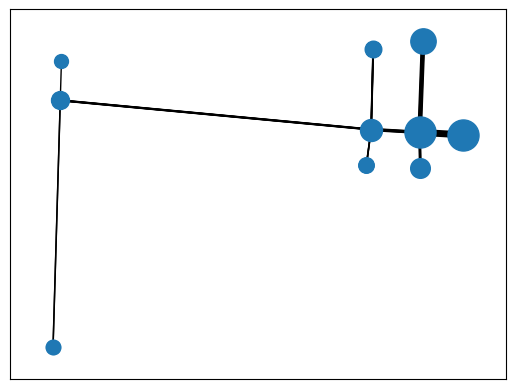

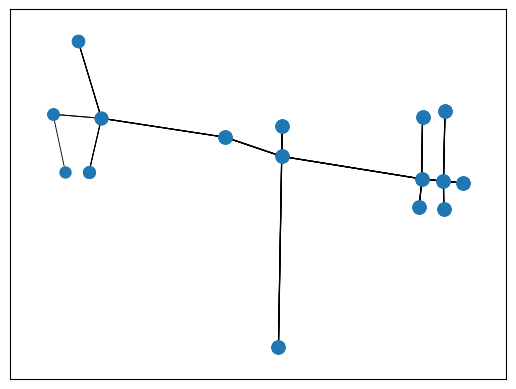

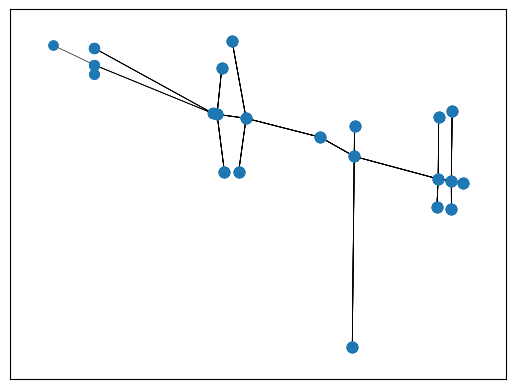

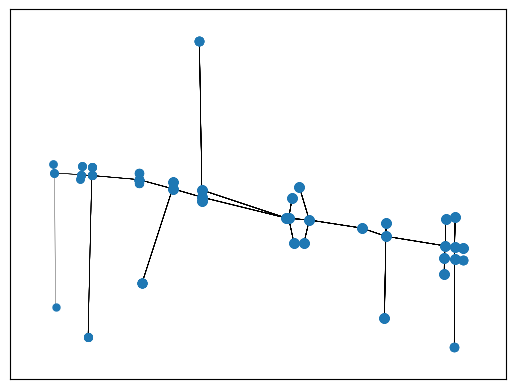

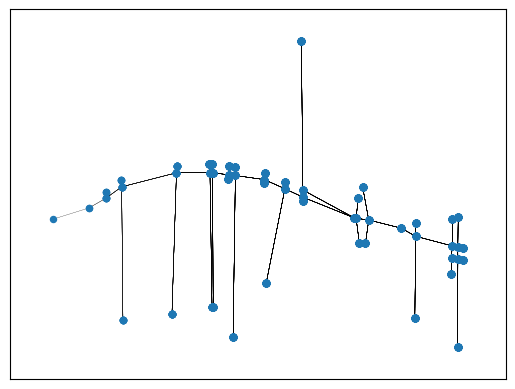

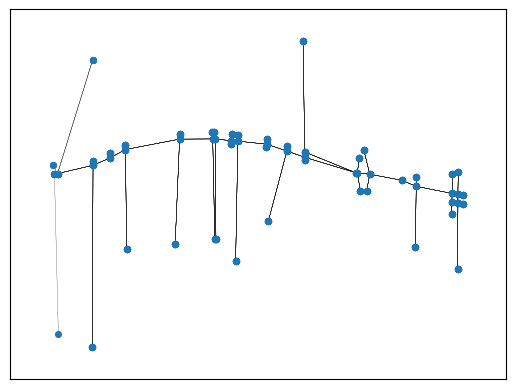

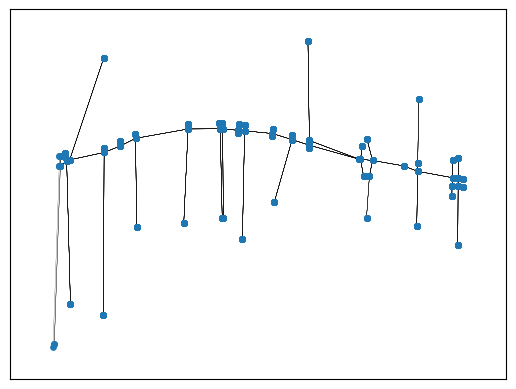

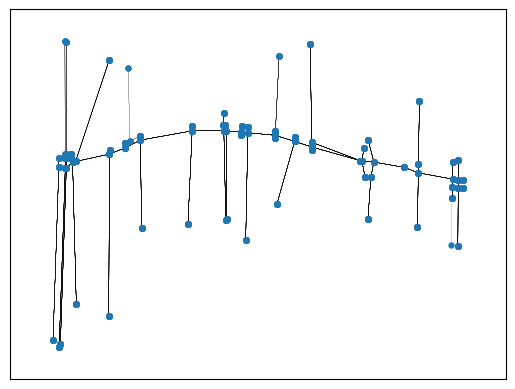

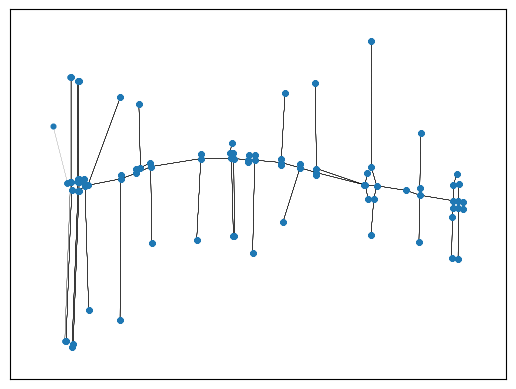

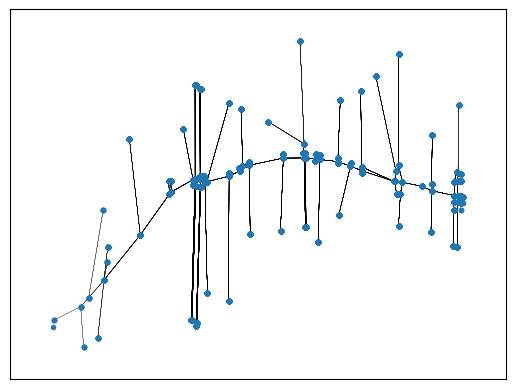

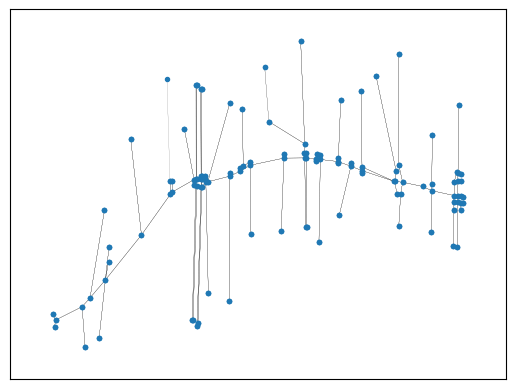

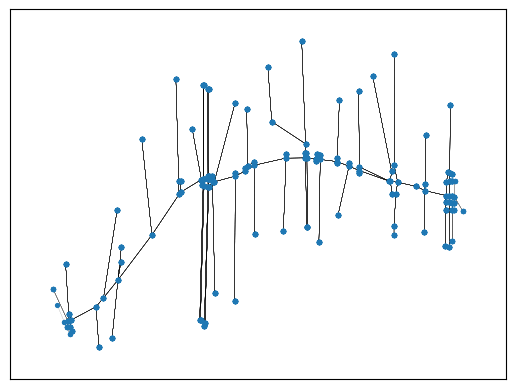

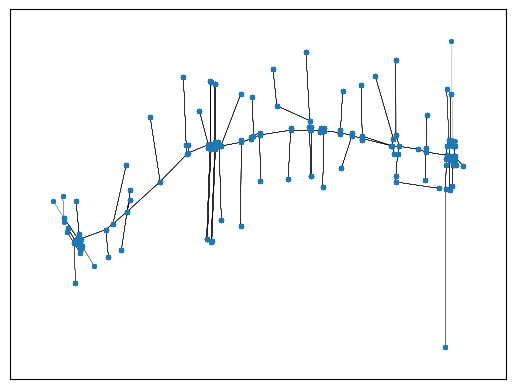

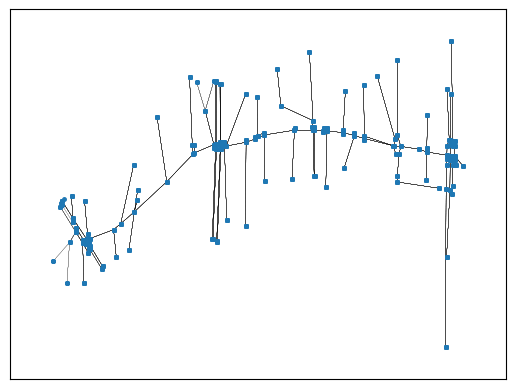

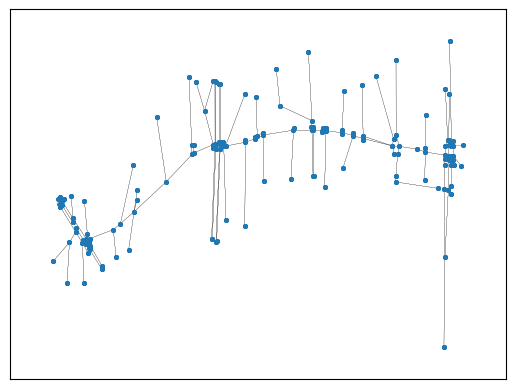

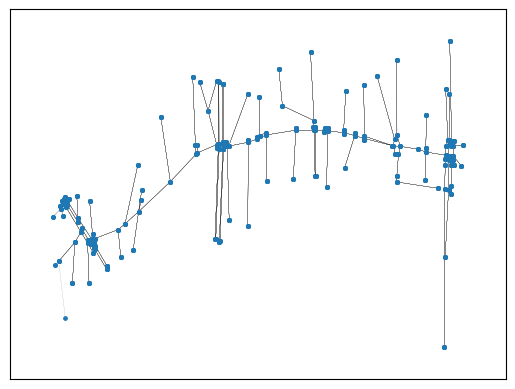

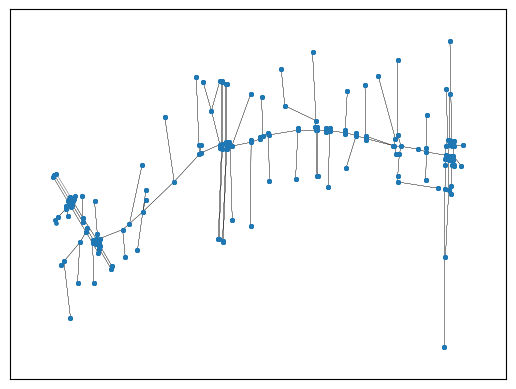

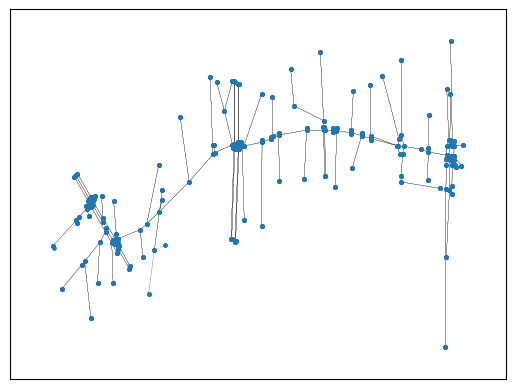

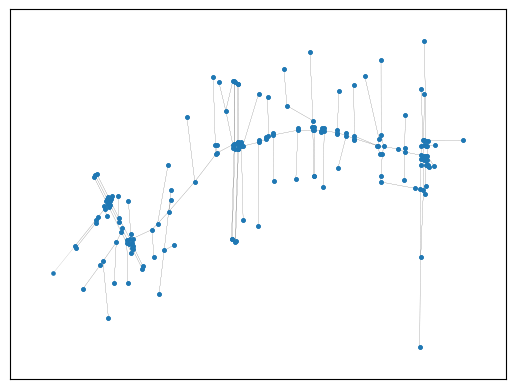

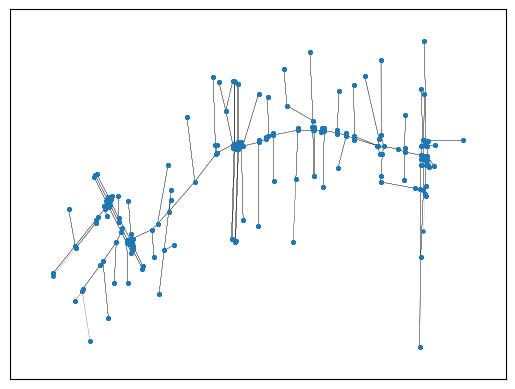

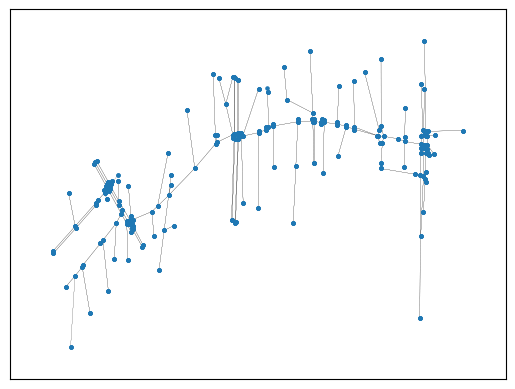

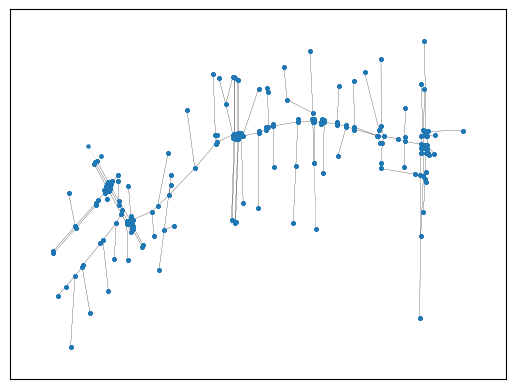

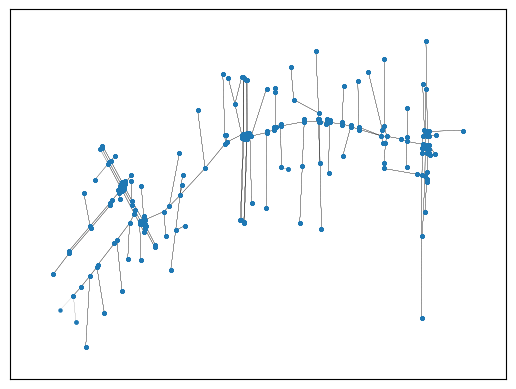

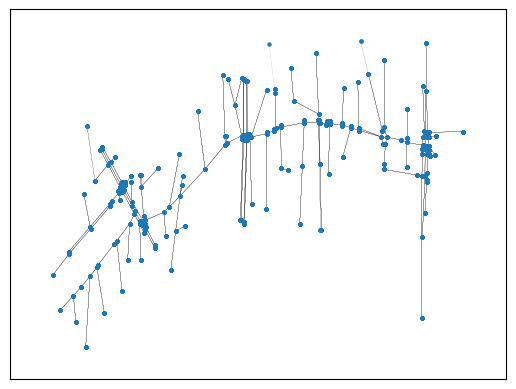

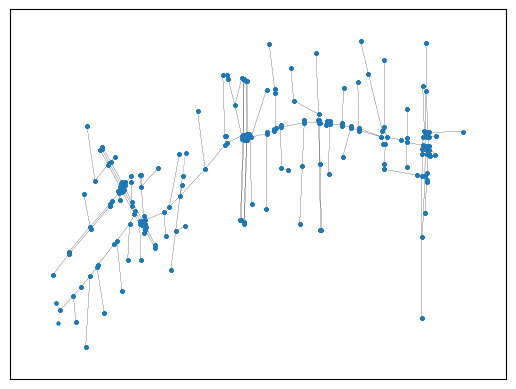

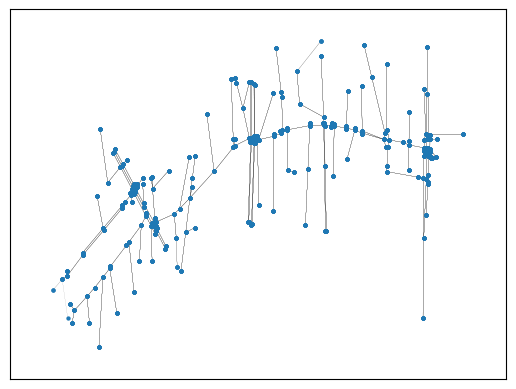

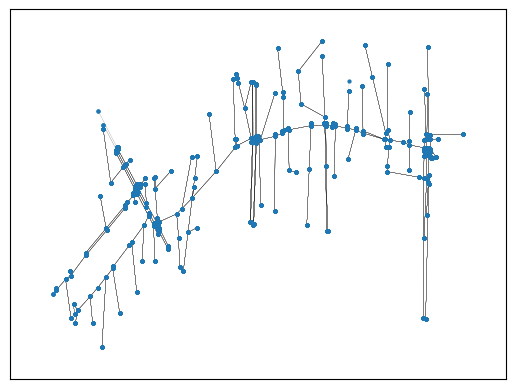

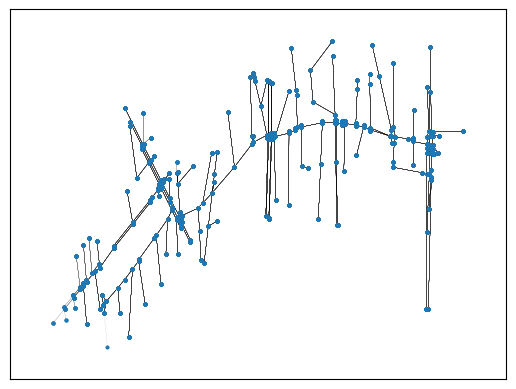

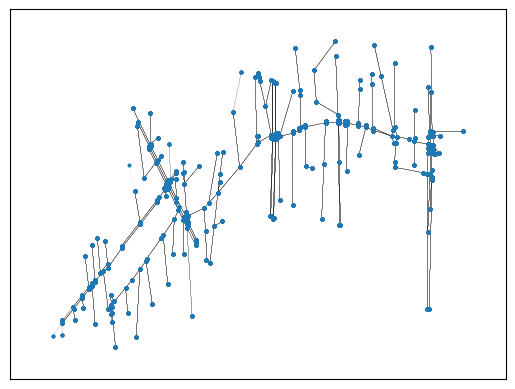

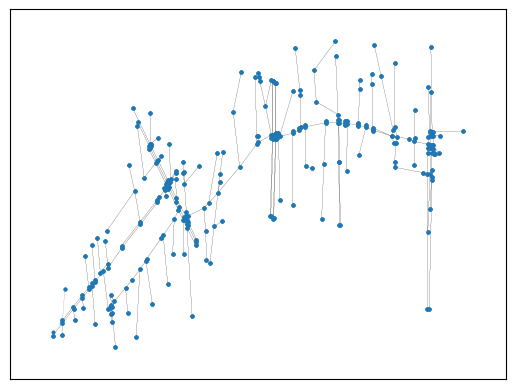

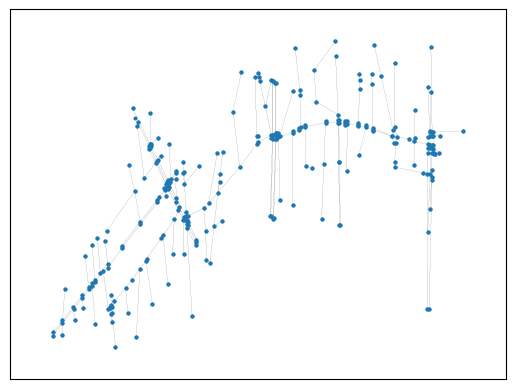

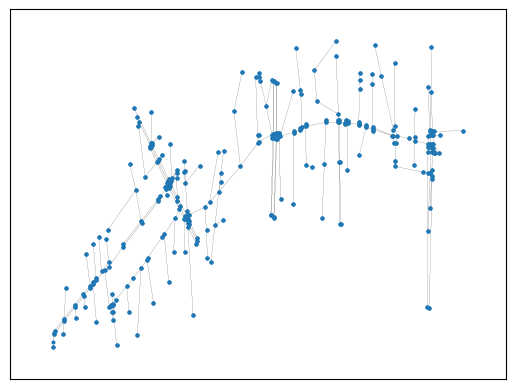

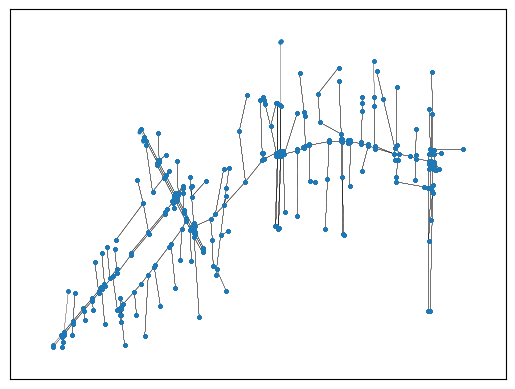

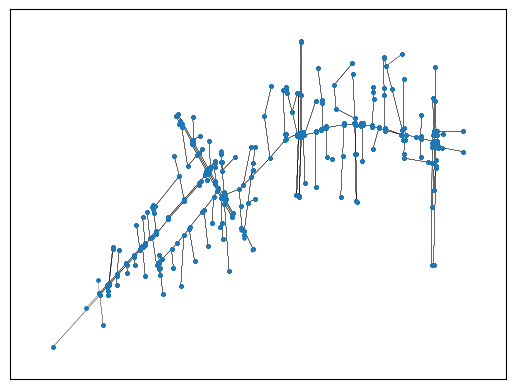

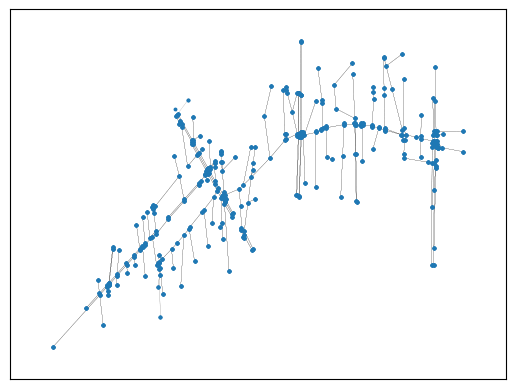

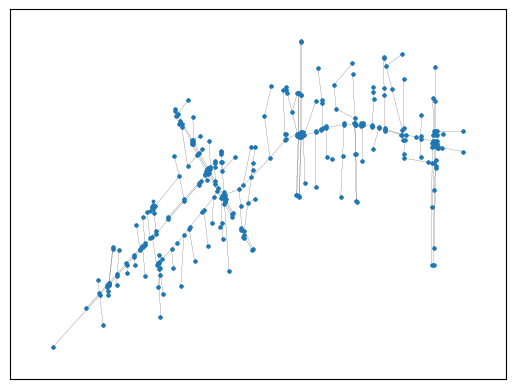

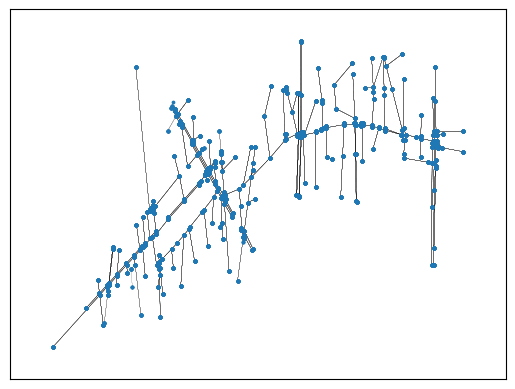

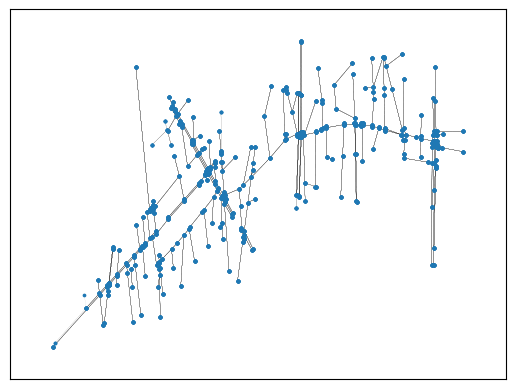

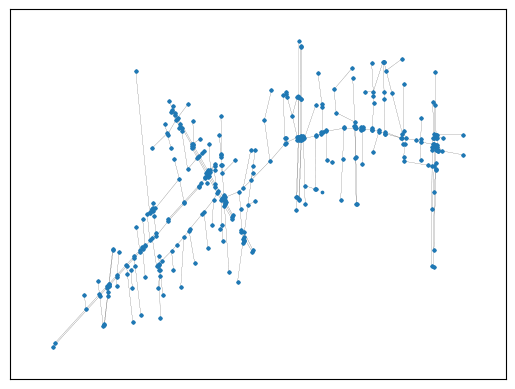

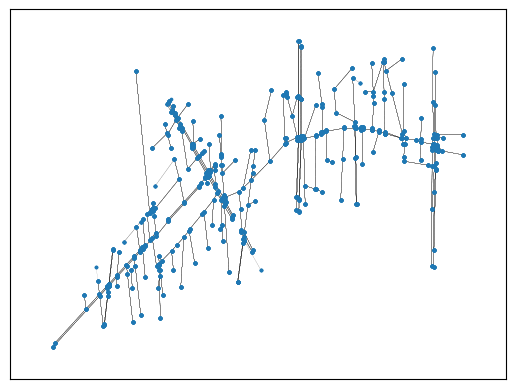

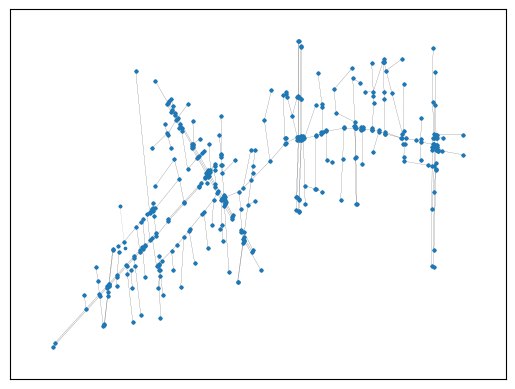

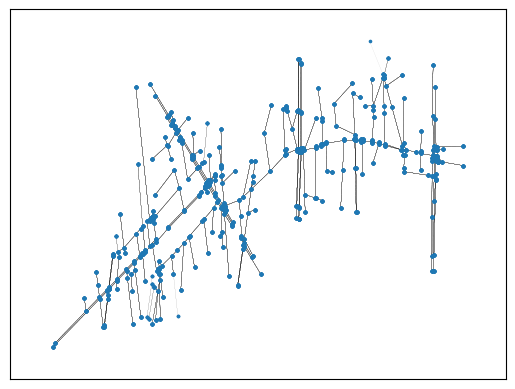

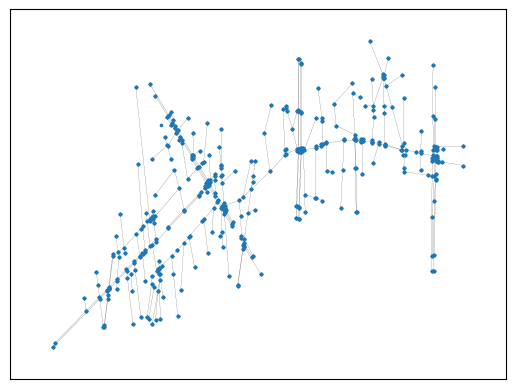

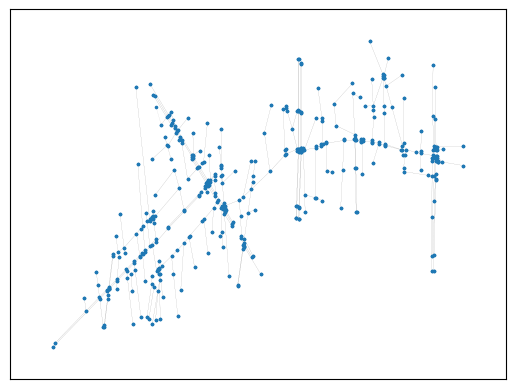

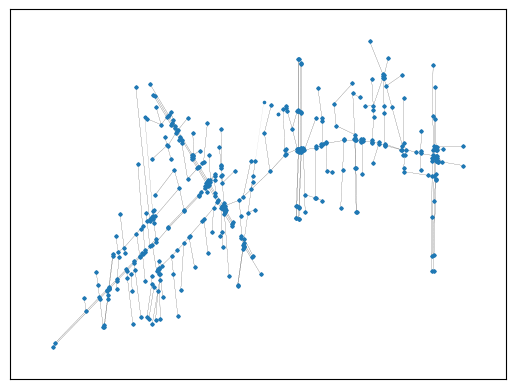

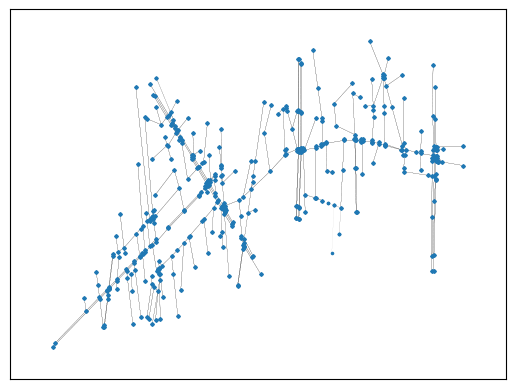

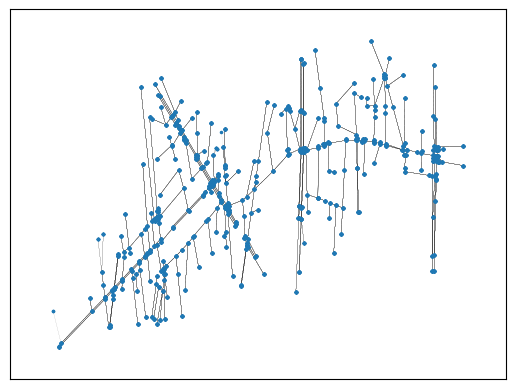

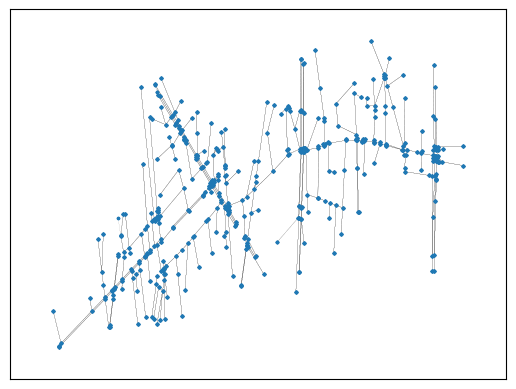

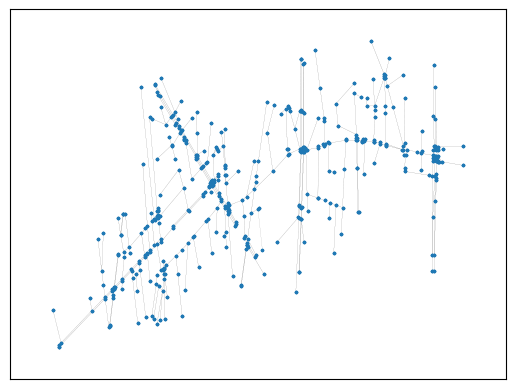

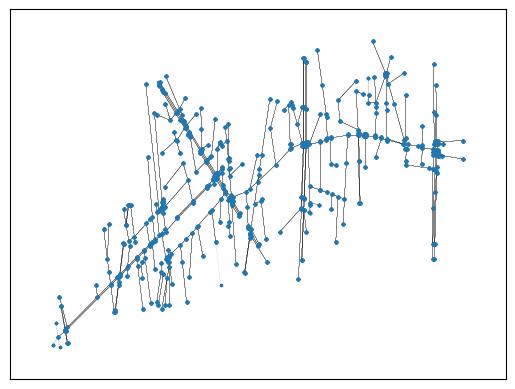

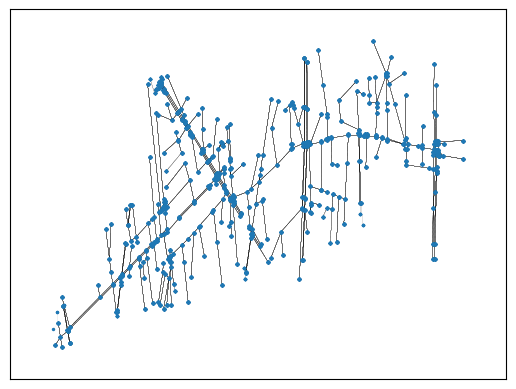

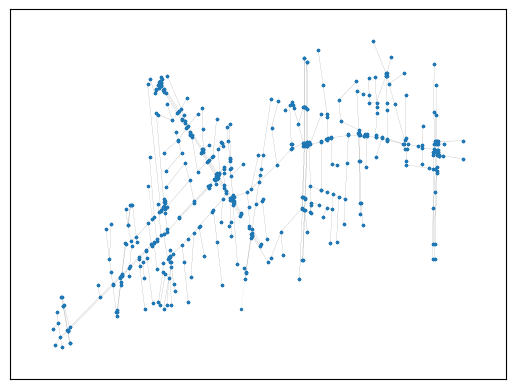

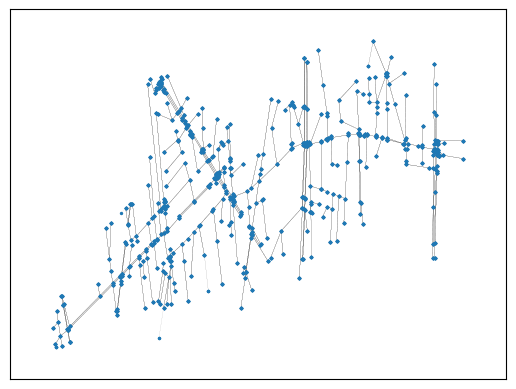

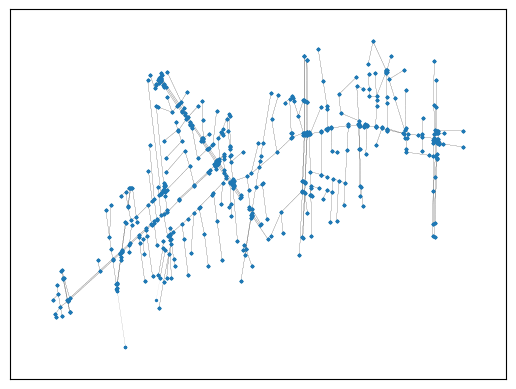

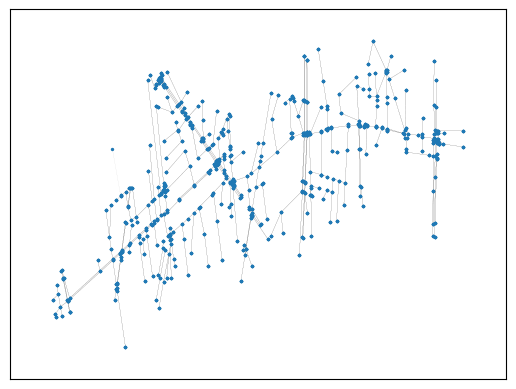

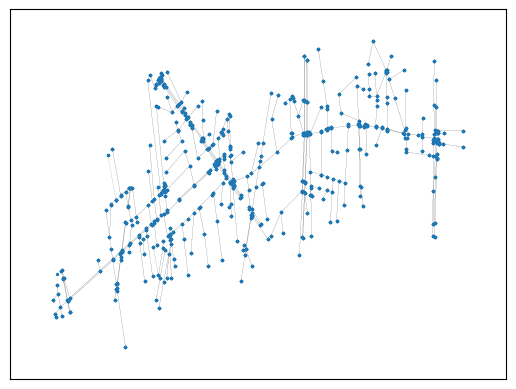

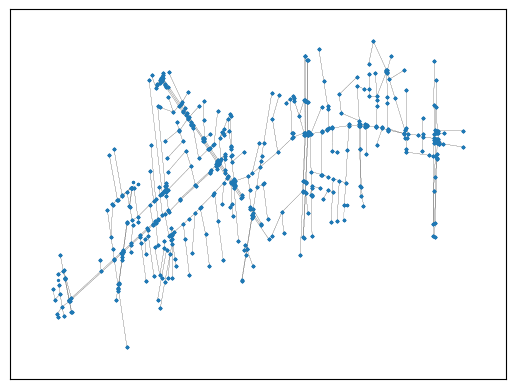

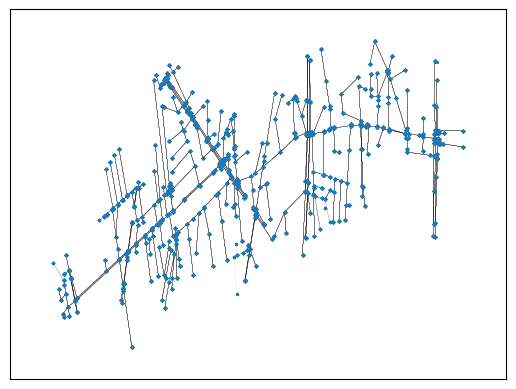

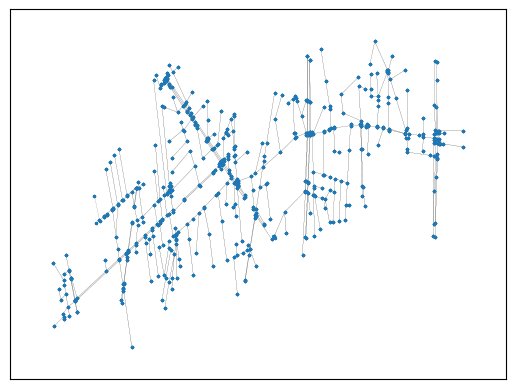

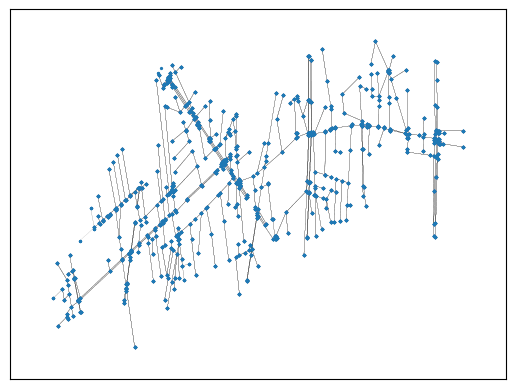

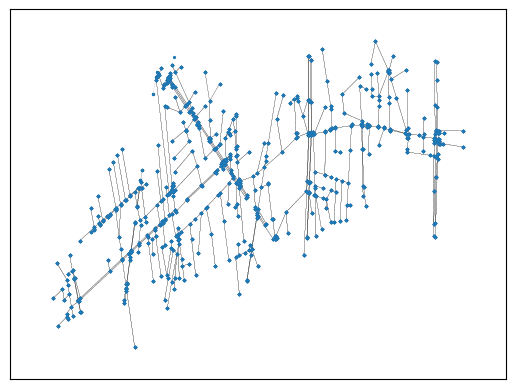

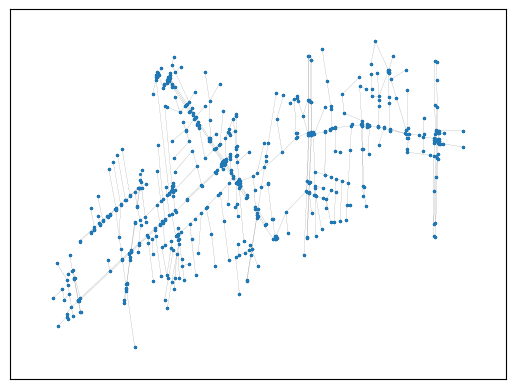

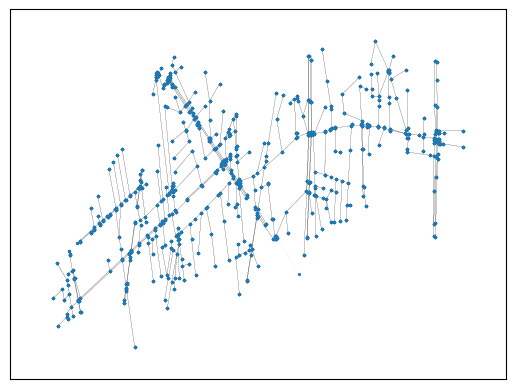

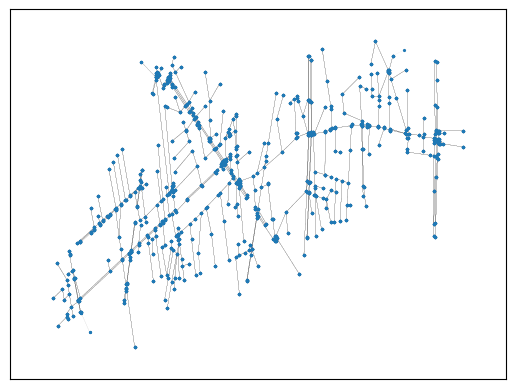

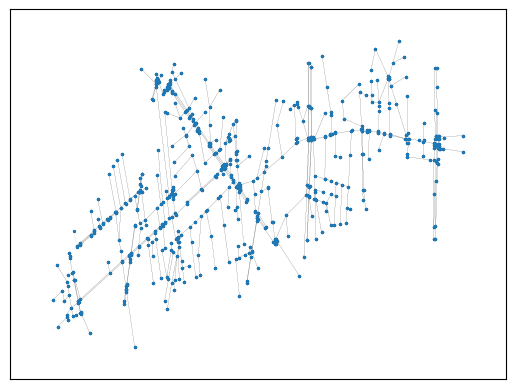

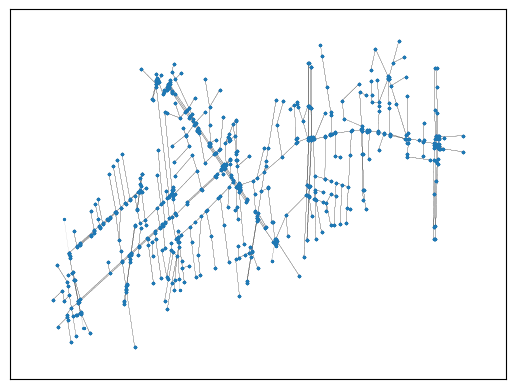

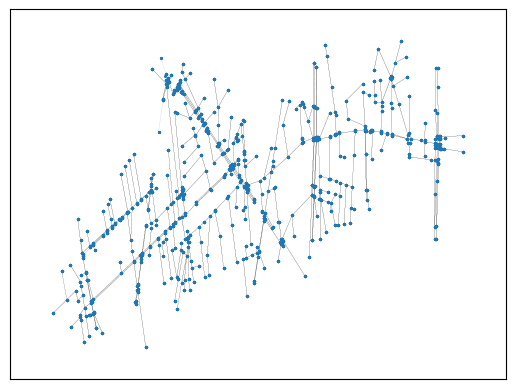

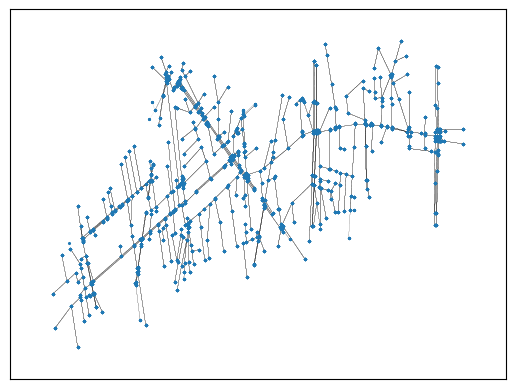

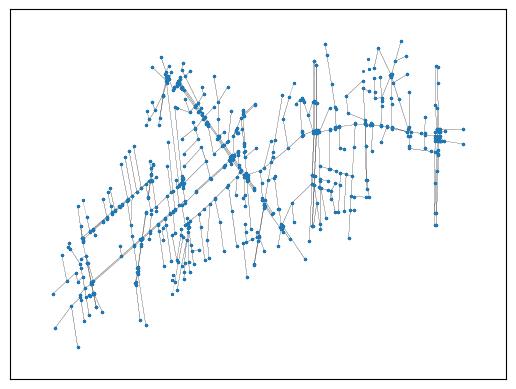

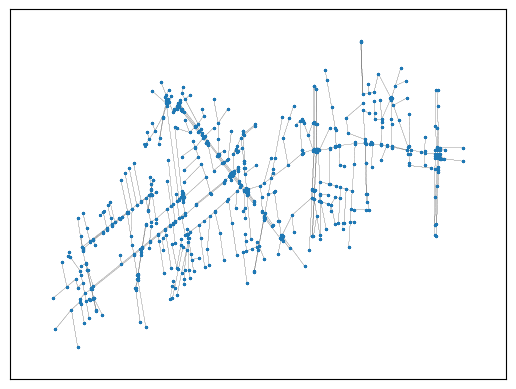

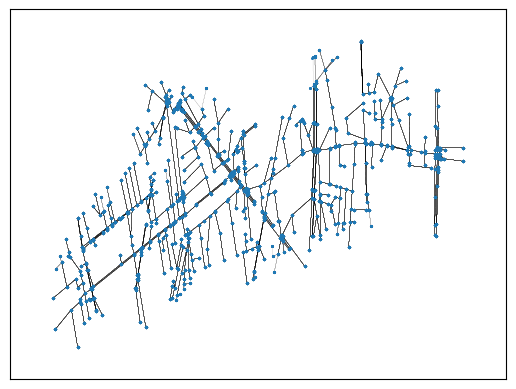

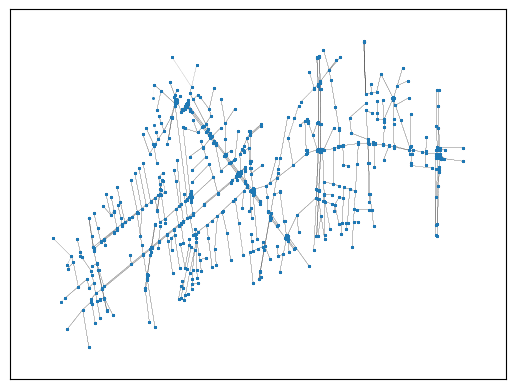

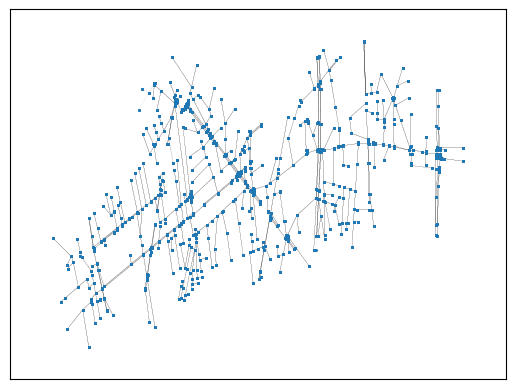

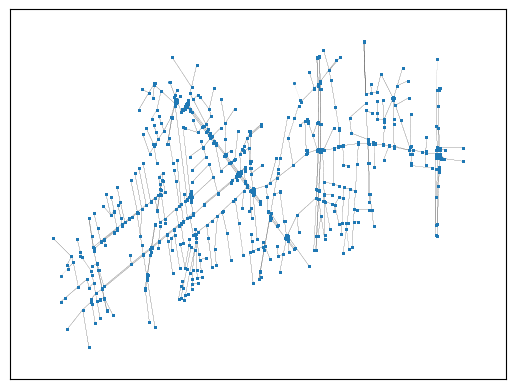

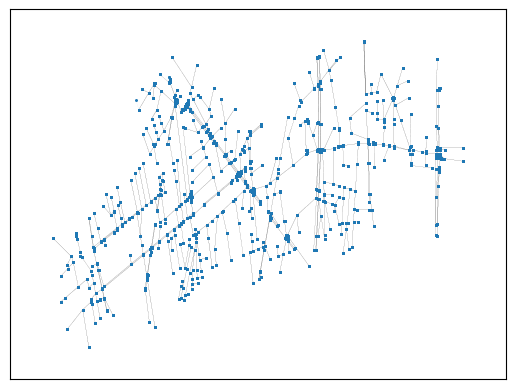

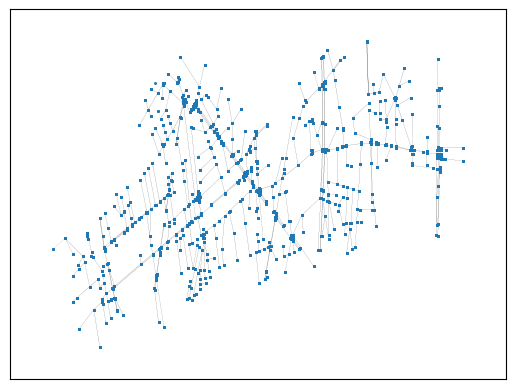

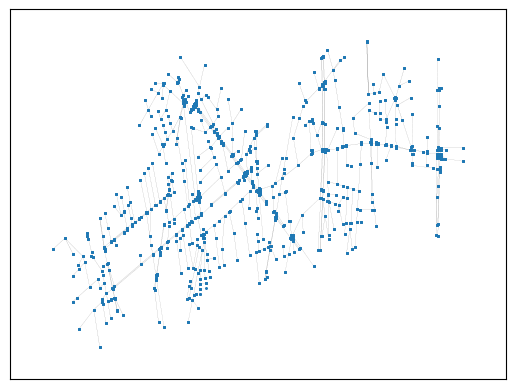

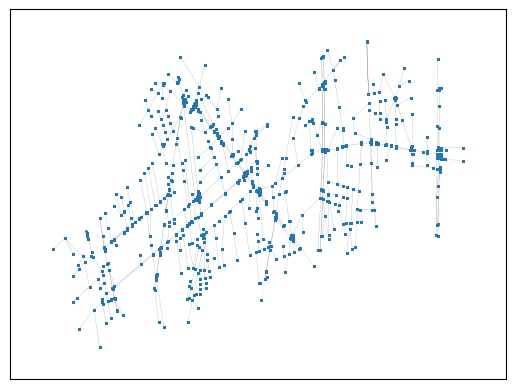

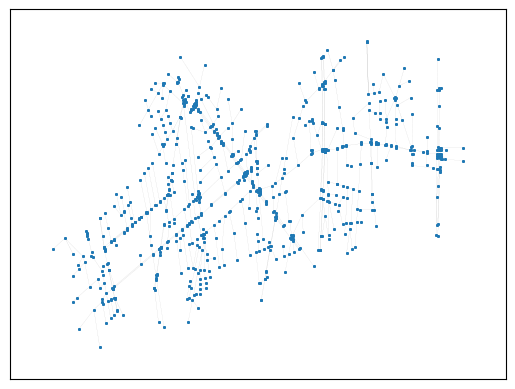

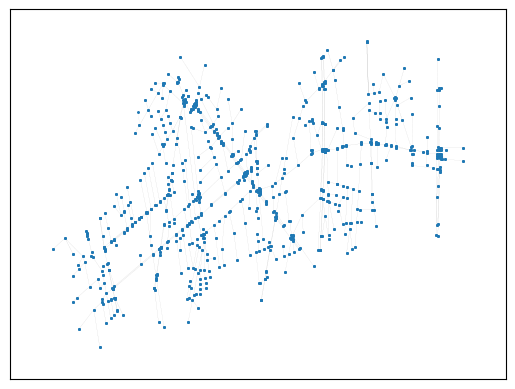

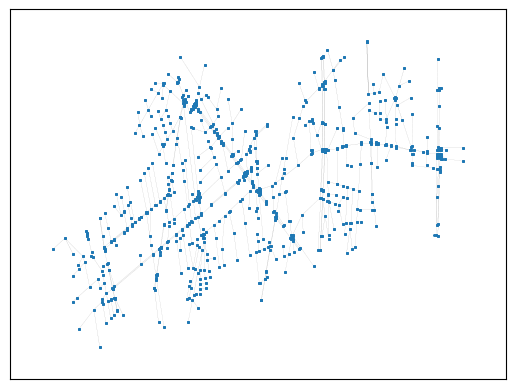

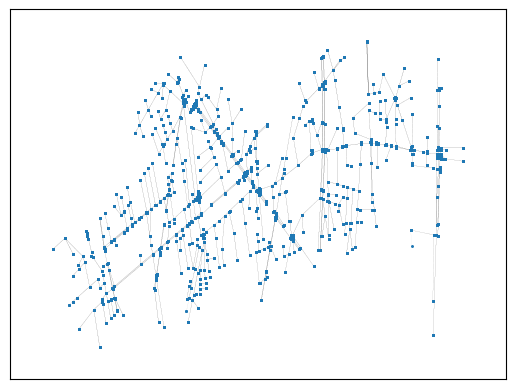

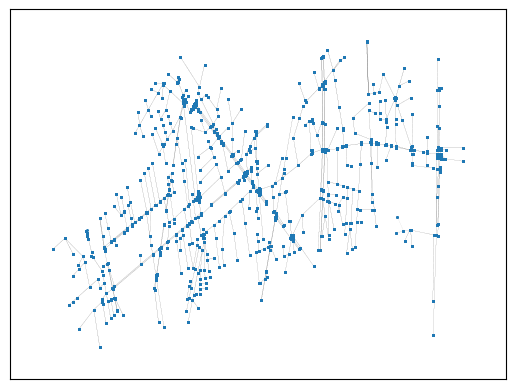

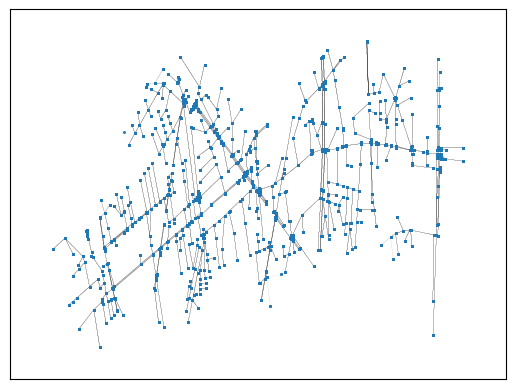

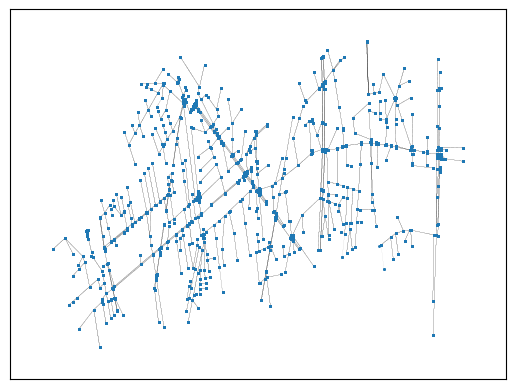

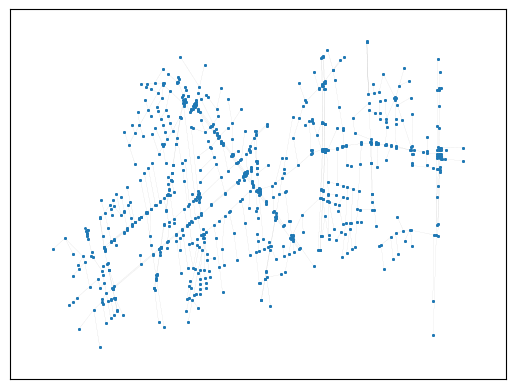

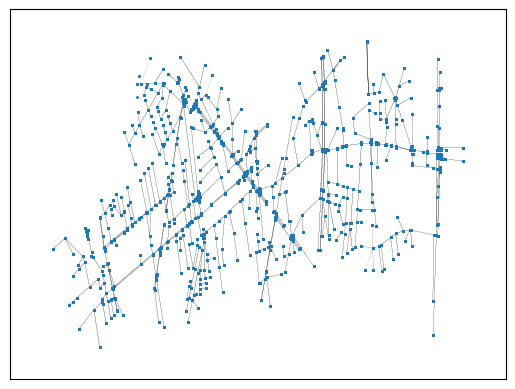

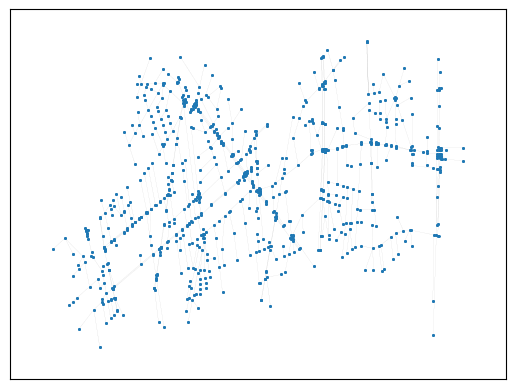

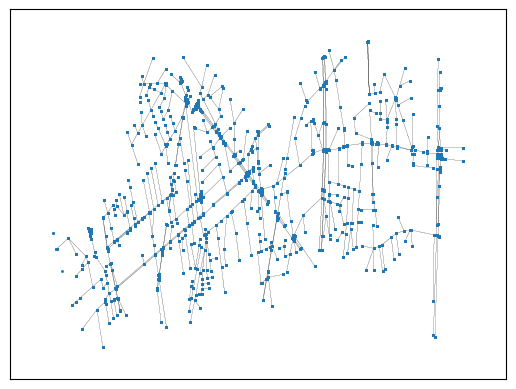

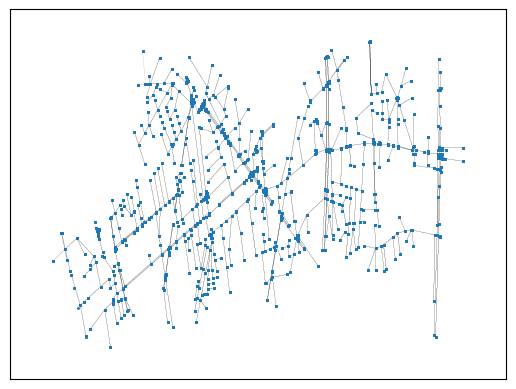

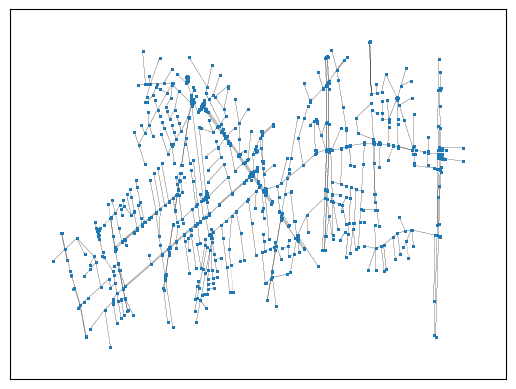

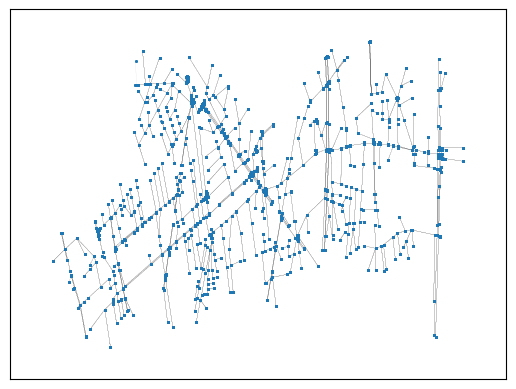

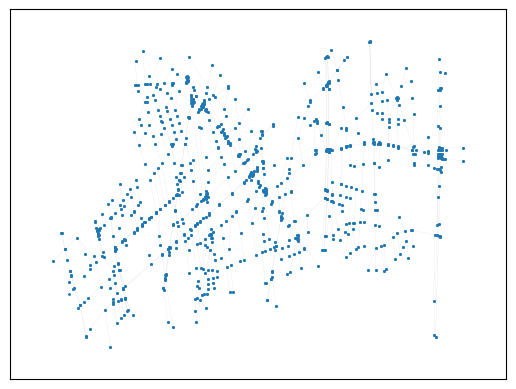

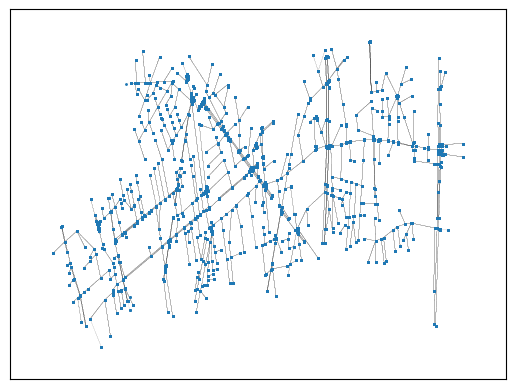

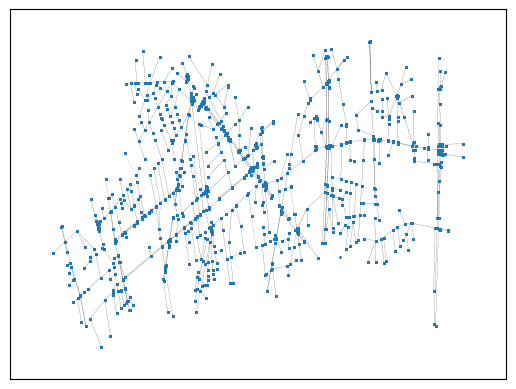

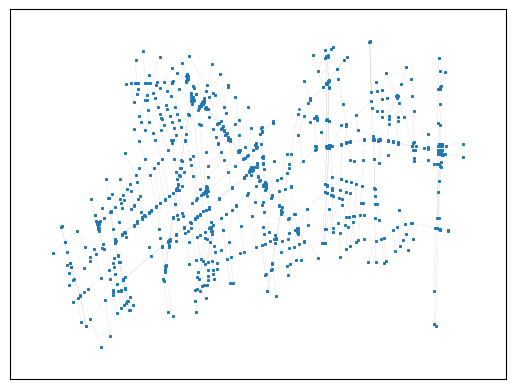

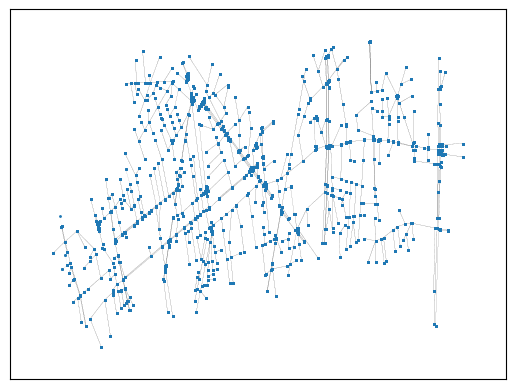

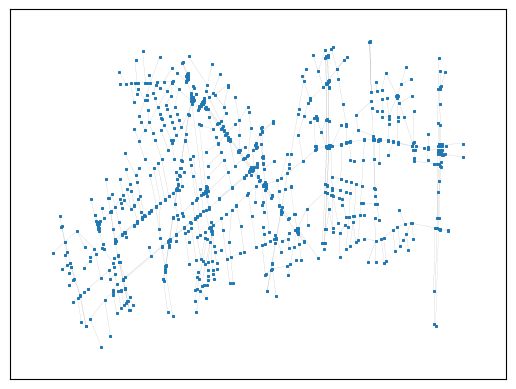

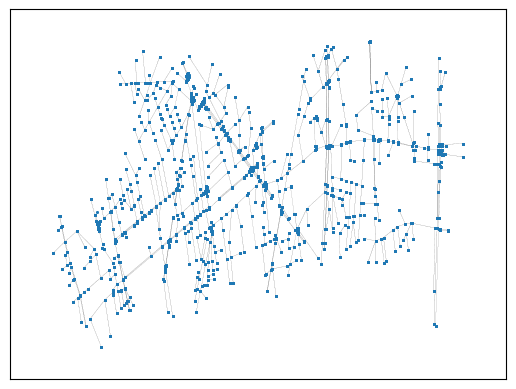

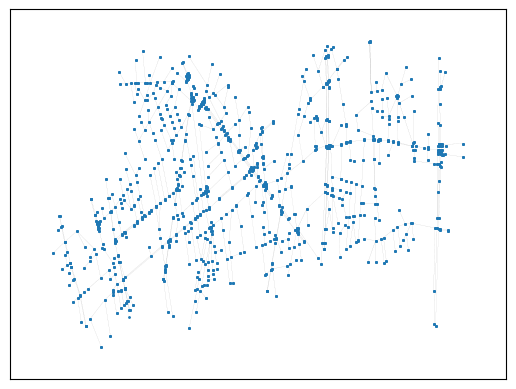

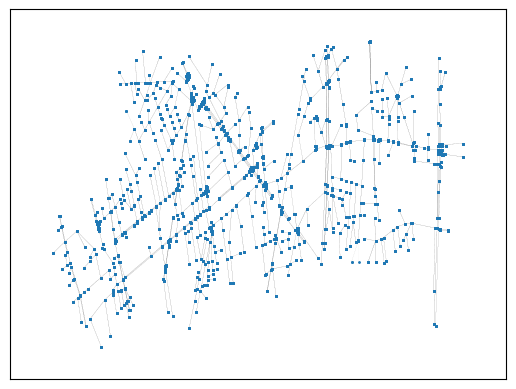

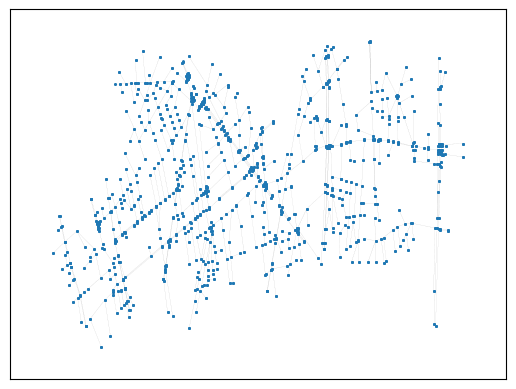

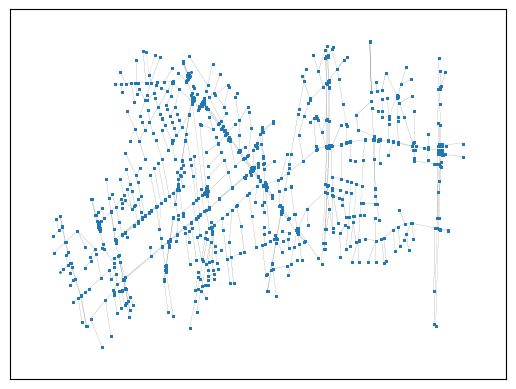

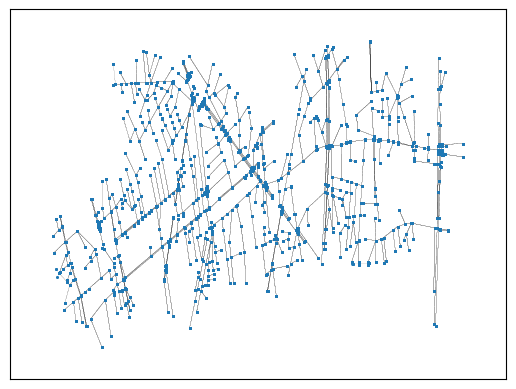

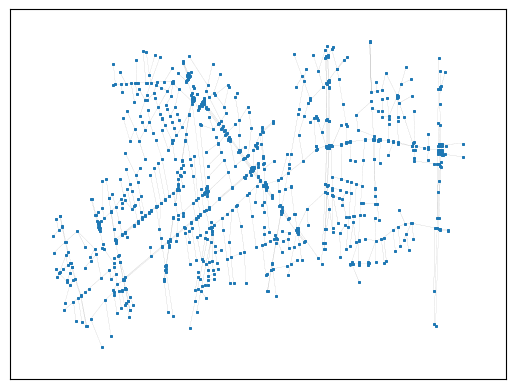

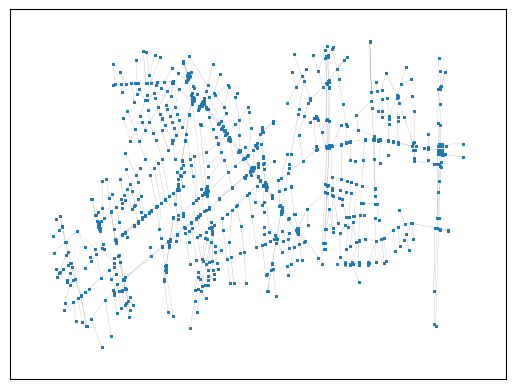

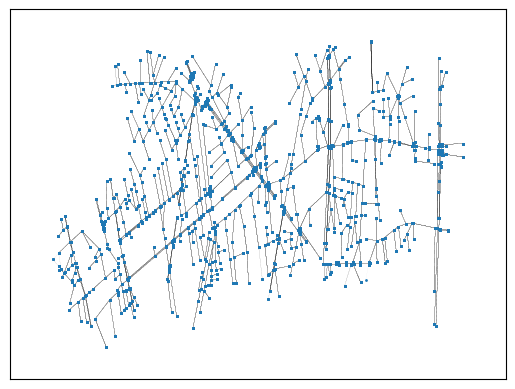

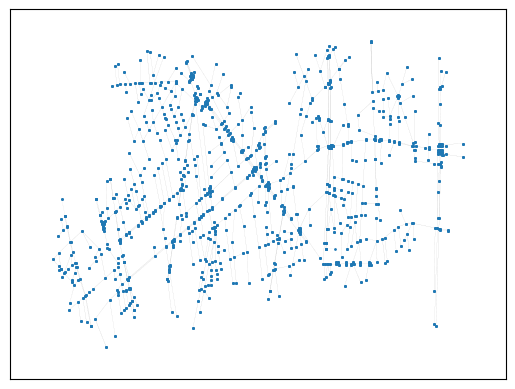

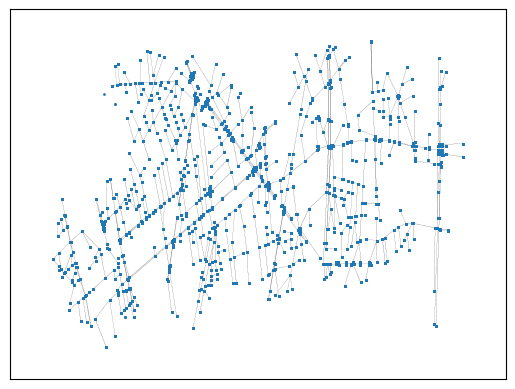

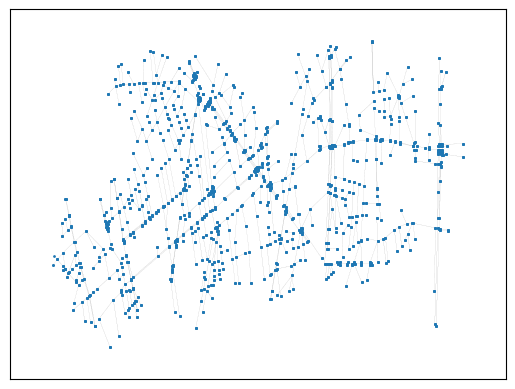

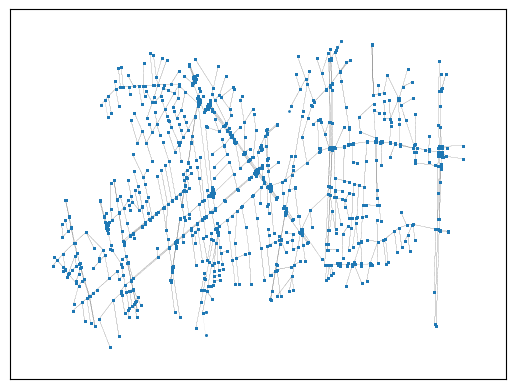

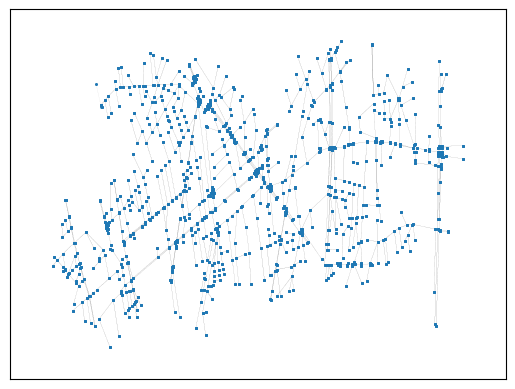

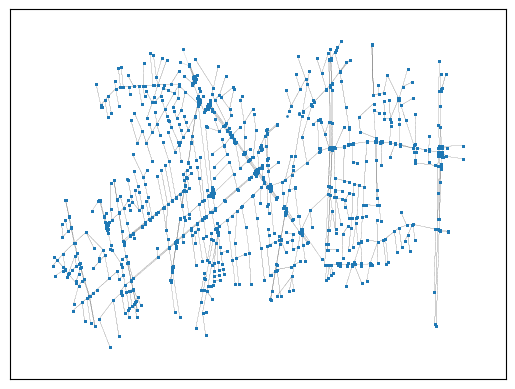

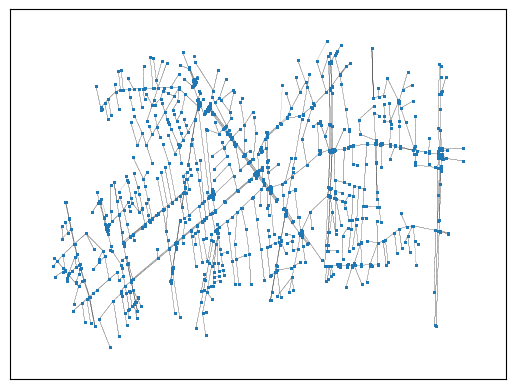

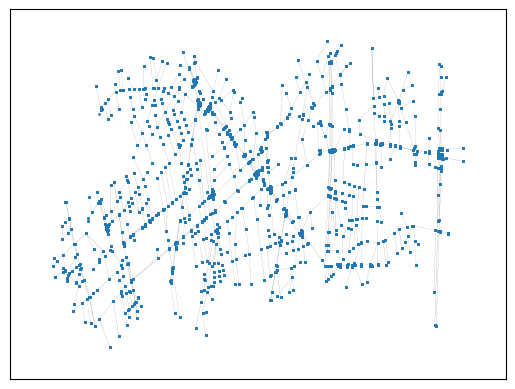

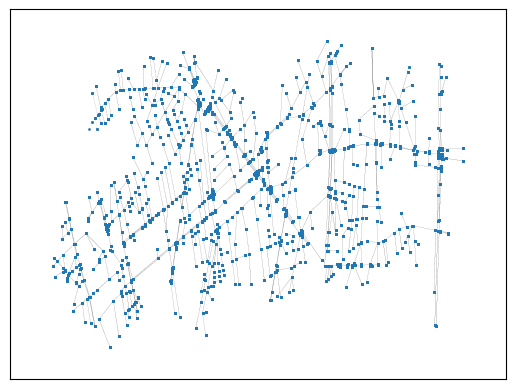

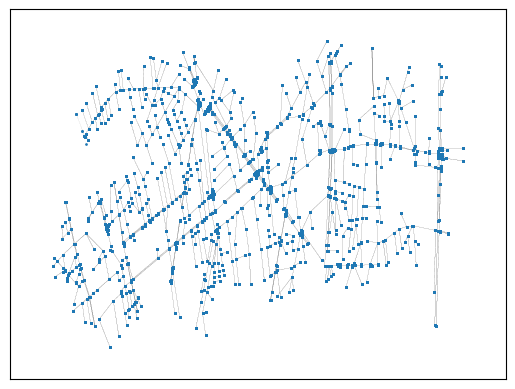

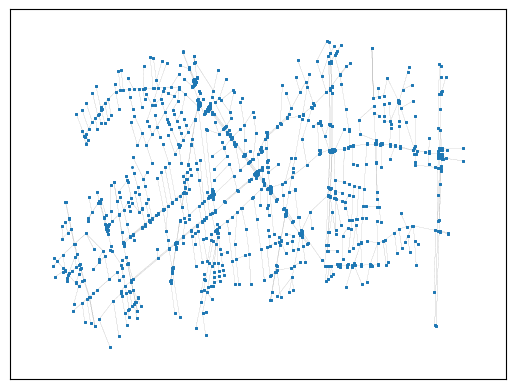

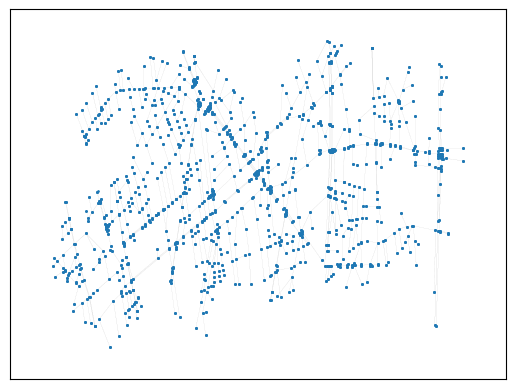

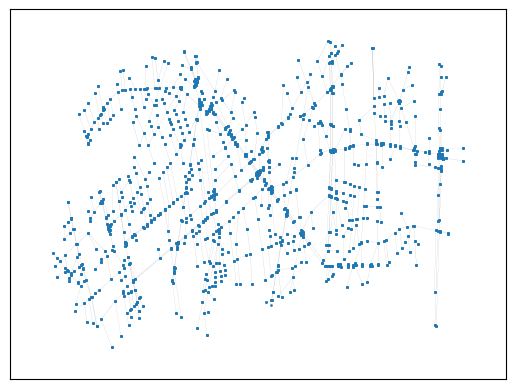

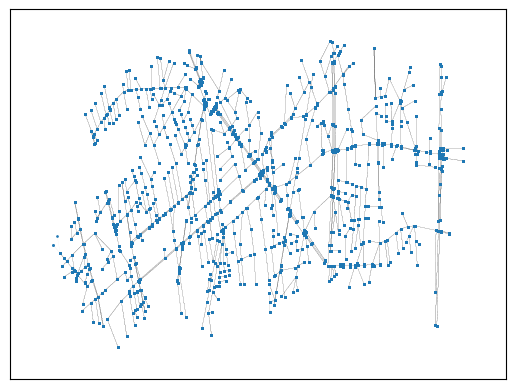

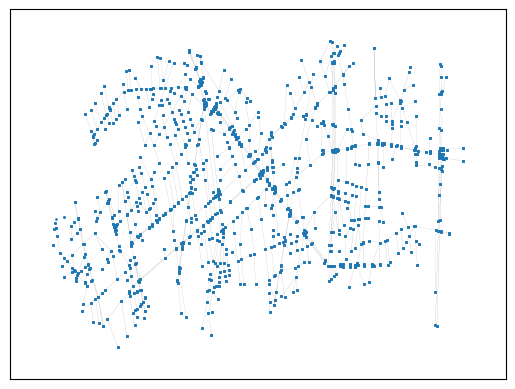

NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERMINAL TROUVE
NOEUD TERM

In [18]:
#resultastar = algo.a_star(graphParis,135578024, 2160034030)
resultastar = algo.a_star(graphParis,135578024, 9429648010, 1.0, 1000)
#resultastar = algo.a_star(graphParis,135578024, 17348293)
#resultastar = algo.a_star(graphParis,135578024, 277591245)
print(resultastar)

In [ ]:
#resultastar = algo.a_star_heur(graphParis,135578024, 2160034030)
resultastar = algo.a_star_heur(graphParis,135578024, 9429648010)
#resultastar = algo.a_star_heur(graphParis,135578024, 17348293)
#resultastar = algo.a_star_heur(graphParis,135578024, 277591245)

KeyboardInterrupt: 

In [ ]:
#resultastarndt = algo.a_star_ndtree(graphParis,135578024, 2160034030)
#resultastarndt = algo.a_star_ndtree(graphParis,135578024, 9429648010)
#resultastarndt = algo.a_star_ndtree(graphParis,135578024, 17348293)
resultastarndt = algo.a_star_ndtree(graphParis,135578024, 277591245)
print(resultastarndt)
print(resultastarndt[2829333383].root.points_list)

[(array([1627.225, 1627.225,  821.152,    0.   ]), 2829333383, 277591245, 10508, 12571)]
{135578024: <ndtree.ndtree object at 0x0000025637C97E80>, 135578017: <ndtree.ndtree object at 0x00000256394A1100>, 1762073419: <ndtree.ndtree object at 0x00000256394A1B80>, 2078486565: <ndtree.ndtree object at 0x00000256394A1C40>, 2812206923: <ndtree.ndtree object at 0x00000256394A1E20>, 1762073410: <ndtree.ndtree object at 0x000002563990F4C0>, 2354781627: <ndtree.ndtree object at 0x000002563990F1C0>, 2812206588: <ndtree.ndtree object at 0x000002563990F040>, 674728522: <ndtree.ndtree object at 0x000002563990F340>, 5240597749: <ndtree.ndtree object at 0x000002563990F2E0>, 5240597744: <ndtree.ndtree object at 0x000002563990F430>, 2160034007: <ndtree.ndtree object at 0x000002563990F160>, 2160033997: <ndtree.ndtree object at 0x00000256371B28E0>, 2160034034: <ndtree.ndtree object at 0x00000256371B2790>, 2160034030: <ndtree.ndtree object at 0x00000256371B21C0>, 2160033987: <ndtree.ndtree object at 0x0000

In [ ]:
print(graphParis.nodes[135578024])

{'lon': '48.8985244', 'lat': '2.3590203', 'heuristique': 1941.7430152482327}


In [38]:
print(resultastar)
for record in resultastar.values():
    for k in record:
        if k[1] == 135578024:
            print(k)

{135578024: rec.array([(array([0, 0, 0, 0]), -1, 135578024, -1, 0)],
          dtype=[('weights', 'O'), ('prevnode', '<i8'), ('node', '<i8'), ('previd', '<i8'), ('id', '<i8')]), 135578017: rec.array([(array([19.016, 19.016, 19.016,  0.   ]),  135578024, 135578017,   0,    1),
           (array([39.314, 39.314,  0.   ,  0.   ]), 2812206930, 135578017, 312, 1101)],
          dtype=[('weights', 'O'), ('prevnode', '<i8'), ('node', '<i8'), ('previd', '<i8'), ('id', '<i8')]), 1762073419: rec.array([(array([25.668, 25.668, 25.668,  0.   ]),  135578024, 1762073419,    0,    2),
           (array([66.264, 66.264, 21.307,  0.   ]), 2354781627, 1762073419,  276,  279),
           (array([89.177, 89.177,  0.   ,  0.   ]), 2354781627, 1762073419, 1185, 1188)],
          dtype=[('weights', 'O'), ('prevnode', '<i8'), ('node', '<i8'), ('previd', '<i8'), ('id', '<i8')]), 2078486565: rec.array([(array([21.307, 21.307, 21.307,  0.   ]),  135578024, 2078486565,   0,    3),
           (array([44.22, 44.22,

In [23]:
for record in resultastar.values():
    for k in record:
        if k[4] == 14:
            print(k)

(array([181.566, 152.181, 152.181,   0.   ]), 2354781607, 2537082845, 12, 14)


In [24]:
for record in resultastar.values():
    for k in record:
        if k[4] == 11:
            print(k)

(array([55.329, 55.329, 37.8  ,  0.   ]), 2537082851, 2537082852, 6, 11)


In [25]:
for record in resultastar.values():
    for k in record:
        if k[4] == 6:
            print(k)

(array([37.8, 37.8, 37.8,  0. ]), 1762073419, 2537082851, 2, 6)


In [26]:
for record in resultastar.values():
    for k in record:
        if k[4] == 3:
            print(k)

(array([21.307, 21.307, 21.307,  0.   ]), 135578024, 2078486565, 0, 3)


In [27]:
def lazy_backtrack(input, end):
    counter = 0
    possible_paths = {}
    for record in input.values():
        for k in record:
            if k[2] == end:
                possible_paths[counter] = []
                possible_paths[counter].append(k)
                counter += 1
    for key in possible_paths.keys():
        startfound = False
        curval = possible_paths[key][-1][3]
        while not startfound:
            for record in input.values():
                if startfound:
                    break
                for k in record:
                    if startfound:
                        break
                    if k[4] == curval:
                        possible_paths[key].append(k)
                        curval = k[3]
                        if curval == 0:
                            startfound = True
                            break

    return possible_paths

In [32]:
output = lazy_backtrack(resultastar, 17348293)

[(array([2066.424, 2066.424, 1992.531,    0.   ]), 277614019, 17348293, 3829, 4211), (array([1992.531, 1992.531, 1992.531,    0.   ]), 5422508973, 277614019, 1577, 3829), (array([1970.982, 1970.982, 1970.982,    0.   ]), 277614017, 5422508973, 1093, 1577), (array([1778.006, 1778.006, 1778.006,    0.   ]), 2829333397, 277614017, 442, 1093), (array([1724.506, 1724.506, 1724.506,    0.   ]), 8927783116, 2829333397, 266, 442), (array([1614.797, 1614.797, 1614.797,    0.   ]), 2284399767, 8927783116, 106, 266), (array([1525.647, 1525.647, 1525.647,    0.   ]), 2284399764, 2284399767, 86, 106), (array([1401.018, 1401.018, 1401.018,    0.   ]), 9561713749, 2284399764, 82, 86), (array([1275.182, 1275.182, 1275.182,    0.   ]), 209141078, 9561713749, 78, 82), (array([1264.775, 1264.775, 1264.775,    0.   ]), 9561713745, 209141078, 76, 78), (array([1256.233, 1256.233, 1256.233,    0.   ]), 2829333380, 9561713745, 72, 76), (array([1115.434, 1115.434, 1115.434,    0.   ]), 209141276, 2829333380, 6

In [35]:
print(len(output))
print(output[0])

49
[(array([2066.424, 2066.424, 1992.531,    0.   ]), 277614019, 17348293, 3829, 4211), (array([1992.531, 1992.531, 1992.531,    0.   ]), 5422508973, 277614019, 1577, 3829), (array([1970.982, 1970.982, 1970.982,    0.   ]), 277614017, 5422508973, 1093, 1577), (array([1778.006, 1778.006, 1778.006,    0.   ]), 2829333397, 277614017, 442, 1093), (array([1724.506, 1724.506, 1724.506,    0.   ]), 8927783116, 2829333397, 266, 442), (array([1614.797, 1614.797, 1614.797,    0.   ]), 2284399767, 8927783116, 106, 266), (array([1525.647, 1525.647, 1525.647,    0.   ]), 2284399764, 2284399767, 86, 106), (array([1401.018, 1401.018, 1401.018,    0.   ]), 9561713749, 2284399764, 82, 86), (array([1275.182, 1275.182, 1275.182,    0.   ]), 209141078, 9561713749, 78, 82), (array([1264.775, 1264.775, 1264.775,    0.   ]), 9561713745, 209141078, 76, 78), (array([1256.233, 1256.233, 1256.233,    0.   ]), 2829333380, 9561713745, 72, 76), (array([1115.434, 1115.434, 1115.434,    0.   ]), 209141276, 2829333380

In [36]:
from overpass import API

def get_pos_at(osm_id, api):
    pos = api.get(f'node(id:{osm_id});', responseformat="csv(::lon,::lat)")

    return (float(pos[1][1]), float(pos[1][0]))

api = API()

positions = []

for edge in output[1]:
    pos1 = get_pos_at(edge[1], api)
    pos2 = get_pos_at(edge[2], api)

    positions.append(pos1)
    positions.append(pos2)

print(positions)

[(48.898191, 2.3860098), (48.8976299, 2.3854683), (48.8988505, 2.3825694), (48.898191, 2.3860098), (48.8988356, 2.3817766), (48.8988505, 2.3825694), (48.898821, 2.3810605), (48.8988356, 2.3817766), (48.898811, 2.3798679), (48.898821, 2.3810605), (48.8988769, 2.3798375), (48.898811, 2.3798679), (48.8988446, 2.3781333), (48.8988769, 2.3798375), (48.898809, 2.3764127), (48.8988446, 2.3781333), (48.898806, 2.3762704), (48.898809, 2.3764127), (48.8988036, 2.3761536), (48.898806, 2.3762704), (48.8987637, 2.3742284), (48.8988036, 2.3761536), (48.8987612, 2.3741172), (48.8987637, 2.3742284), (48.8987594, 2.3740003), (48.8987612, 2.3741172), (48.8987106, 2.3713465), (48.8987594, 2.3740003), (48.8987244, 2.3711722), (48.8987106, 2.3713465), (48.898724, 2.3703361), (48.8987244, 2.3711722), (48.8987236, 2.3702433), (48.898724, 2.3703361), (48.8987233, 2.3701562), (48.8987236, 2.3702433), (48.8986969, 2.3683735), (48.8987233, 2.3701562), (48.898659, 2.366707), (48.8986969, 2.3683735), (48.8986568, 